In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df_mx = pd.read_csv('ValoresAtipicosMx.csv', index_col="id")
df_mx.head(3)

,last_scraped,name,host_id,host_name,host_since,host_response_time,host_is_superhost,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
id,,,,,,,,,,,,,,,,,,,,,
35797,2024-09-25,Villa Dante,153786,Dici,2010-06-28,a few days or more,f,t,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,...,4.88,4.86,4.92,4.93,4.93,4.81,1.0,1.0,0.0,0.0
44616,2024-09-26,Condesa Haus,196253,Fernando,2010-08-09,within an hour,t,t,Mexico City,Cuauhtémoc,...,4.56,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0
67703,2024-09-26,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,2011-01-04,within an hour,t,t,Mexico City,Cuauhtémoc,...,4.81,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0


In [3]:
# Si hay valores no mapeados, remplázalos por 0 (o 1, dependiendo del contexto)
df_mx['host_is_superhost'] = df_mx['host_is_superhost'].map({'t': 1, 'f': 0}).fillna(0).astype(int)
df_mx['instant_bookable'] = df_mx['instant_bookable'].map({'t': 1, 'f': 0}).fillna(0).astype(int)
df_mx['has_availability'] = df_mx['has_availability'].map({'t': 1, 'f': 0}).fillna(0).astype(int)
df_mx['host_identity_verified'] = df_mx['host_identity_verified'].map({'t': 1, 'f': 0}).fillna(0).astype(int)

df_mx['room_type'] = df_mx['room_type'].map({
    'Entire home/apt':1,
    'Private room':2,
    'Hotel room':3,
    'Shared room':4
}).fillna(0).astype(int)
df_mx['property_type'] = df_mx['property_type'].map({
    'Entire villa': 0,
    'Entire home': 1,
    'Entire rental unit': 2,
    'Entire loft': 3,
    'Private room': 4,
    'Private room in rental unit': 5,
    'Private room in home': 6,
    'Private room in condo': 7,
    'Private room in guest suite': 8,
    'Entire condo': 9,
    'Private room in serviced apartment': 10,
    'Room in serviced apartment': 11,
    'Entire guest suite': 12,
    'Private room in townhouse': 13,
    'Room in boutique hotel': 14,
    'Private room in bed and breakfast': 15,
    'Shared room in rental unit': 16,
    'Entire serviced apartment': 17,
    'Tiny home': 18,
    'Entire guesthouse': 19,
    'Private room in guesthouse': 20,
    'Private room in loft': 21,
    'Entire bungalow': 22,
    'Casa particular': 23,
    'Shared room in loft': 24,
    'Entire townhouse': 25,
    'Private room in tiny home': 26,
    'Shared room in guesthouse': 27,
    'Room in bed and breakfast': 28,
    'Shared room in hostel': 29,
    'Private room in farm stay': 30,
    'Shared room in home': 31,
    'Private room in villa': 32,
    'Entire cabin': 33,
    'Private room in casa particular': 34,
    'Room in hotel': 35,
    'Private room in floor': 36,
    'Private room in cabin': 37,
    'Shared room in guest suite': 38,
    'Room in aparthotel': 39,
    'Entire place': 40,
    'Private room in hostel': 41,
    'Earthen home': 42,
    'Entire hostel': 43,
    'Private room in earthen home': 44,
    'Private room in dorm': 45,
    'Private room in hut': 46,
    'Entire cottage': 47,
    'Entire chalet': 48,
    'Shared room in dorm': 49,
    'Entire in-law': 50,
    'Holiday park': 51,
    'Private room in dome': 52,
    'Shared room in condo': 53,
    'Campsite': 54,
    'Private room in vacation home': 55,
    'Room in casa particular': 56,
    'Castle': 57,
    'Private room in barn': 58,
    'Shared room in hotel': 59,
    'Farm stay': 60,
    'Shared room in tiny home': 61,
    'Hut': 62,
    'Shared room in cabin': 63,
    'Private room in cottage': 64,
    'Entire home/apt': 65,
    'Room in hostel': 66,
    'Shared room in serviced apartment': 67,
    'Entire vacation home': 68,
    'Shared room in tent': 69,
    'Shared room in bed and breakfast': 70,
    'Private room in shipping container': 71,
    'Private room in nature lodge': 72,
    'Private room in tower': 73,
    'Private room in lighthouse': 74,
    'Shared room in casa particular': 75,
    'Shared room in townhouse': 76,
    'Shared room in farm stay': 77,
    'Shared room in boutique hotel': 78,
    'Shipping container': 79,
    'Private room in pension': 80,
    'Private room in bungalow': 81,
    'Dome': 82,
    'Tent': 83,
    'Private room in chalet': 84,
    'Private room in tent': 85,
    'Private room in castle': 86,
    'Private room in houseboat': 87,
    'Boat': 88,
    'Private room in resort': 89,
    'Private room in minsu': 90,
    'Tower': 91
}).fillna(0).astype(int)
df_mx.info()


<class 'pandas.core.frame.DataFrame'>
Index: 26582 entries, 35797 to 1252229157495978163
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  26582 non-null  object 
 1   name                                          26582 non-null  object 
 2   host_id                                       26582 non-null  int64  
 3   host_name                                     26582 non-null  object 
 4   host_since                                    26582 non-null  object 
 5   host_response_time                            26582 non-null  object 
 6   host_is_superhost                             26582 non-null  int32  
 7   host_identity_verified                        26582 non-null  int32  
 8   neighbourhood                                 26582 non-null  object 
 9   neighbourhood_cleansed                        26

In [4]:
# Filtrar solo las columnas numéricas (int y float)
df_mx = df_mx.select_dtypes(include=['int64', 'float64', 'int32'])
df_mx.info()


<class 'pandas.core.frame.DataFrame'>
Index: 26582 entries, 35797 to 1252229157495978163
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_id                                       26582 non-null  int64  
 1   host_is_superhost                             26582 non-null  int32  
 2   host_identity_verified                        26582 non-null  int32  
 3   latitude                                      26582 non-null  float64
 4   longitude                                     26582 non-null  float64
 5   property_type                                 26582 non-null  int32  
 6   room_type                                     26582 non-null  int32  
 7   has_availability                              26582 non-null  int32  
 8   instant_bookable                              26582 non-null  int32  
 9   host_response_rate                            26

In [5]:
Corr_Factors = df_mx.corr()
Corr_Factors.head()

,host_id,host_is_superhost,host_identity_verified,latitude,longitude,property_type,room_type,has_availability,instant_bookable,host_response_rate,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
host_id,1.000000,-0.073037,-0.007419,0.044406,0.083448,0.078461,0.038102,-0.010149,0.142772,-0.012528,...,-0.068472,-0.038494,-0.068329,-0.071835,-0.070823,-0.059825,-0.032307,-0.049734,0.092198,0.038399
host_is_superhost,-0.073037,1.000000,0.130198,0.042183,0.013578,-0.045067,-0.161251,0.027868,0.051291,0.206107,...,0.170326,0.175792,0.130693,0.145388,0.030662,0.156497,0.070738,0.133273,-0.010218,-0.029223
host_identity_verified,-0.007419,0.130198,1.000000,0.084611,-0.008805,-0.073782,-0.147594,0.156128,0.094594,0.068286,...,-0.029048,-0.030192,-0.031319,-0.025864,-0.033665,-0.021201,0.039953,0.063977,0.039236,0.017202
latitude,0.044406,0.042183,0.084611,1.000000,0.053535,-0.053465,-0.096108,0.011753,0.113943,0.072127,...,-0.021570,-0.019985,-0.001028,-0.044664,-0.014786,-0.028000,0.149970,0.115353,-0.000145,0.049311
longitude,0.083448,0.013578,-0.008805,0.053535,1.000000,0.052588,0.076400,-0.011481,-0.028182,-0.007957,...,-0.018133,-0.020894,-0.002347,0.003535,-0.119594,-0.005633,-0.052185,-0.088942,0.015680,0.011543


In [6]:
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1.head()

,host_id,host_is_superhost,host_identity_verified,latitude,longitude,property_type,room_type,has_availability,instant_bookable,host_response_rate,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
host_id,1.000000,0.073037,0.007419,0.044406,0.083448,0.078461,0.038102,0.010149,0.142772,0.012528,...,0.068472,0.038494,0.068329,0.071835,0.070823,0.059825,0.032307,0.049734,0.092198,0.038399
host_is_superhost,0.073037,1.000000,0.130198,0.042183,0.013578,0.045067,0.161251,0.027868,0.051291,0.206107,...,0.170326,0.175792,0.130693,0.145388,0.030662,0.156497,0.070738,0.133273,0.010218,0.029223
host_identity_verified,0.007419,0.130198,1.000000,0.084611,0.008805,0.073782,0.147594,0.156128,0.094594,0.068286,...,0.029048,0.030192,0.031319,0.025864,0.033665,0.021201,0.039953,0.063977,0.039236,0.017202
latitude,0.044406,0.042183,0.084611,1.000000,0.053535,0.053465,0.096108,0.011753,0.113943,0.072127,...,0.021570,0.019985,0.001028,0.044664,0.014786,0.028000,0.149970,0.115353,0.000145,0.049311
longitude,0.083448,0.013578,0.008805,0.053535,1.000000,0.052588,0.076400,0.011481,0.028182,0.007957,...,0.018133,0.020894,0.002347,0.003535,0.119594,0.005633,0.052185,0.088942,0.015680,0.011543


**Mapa de calor de México**

<Axes: >

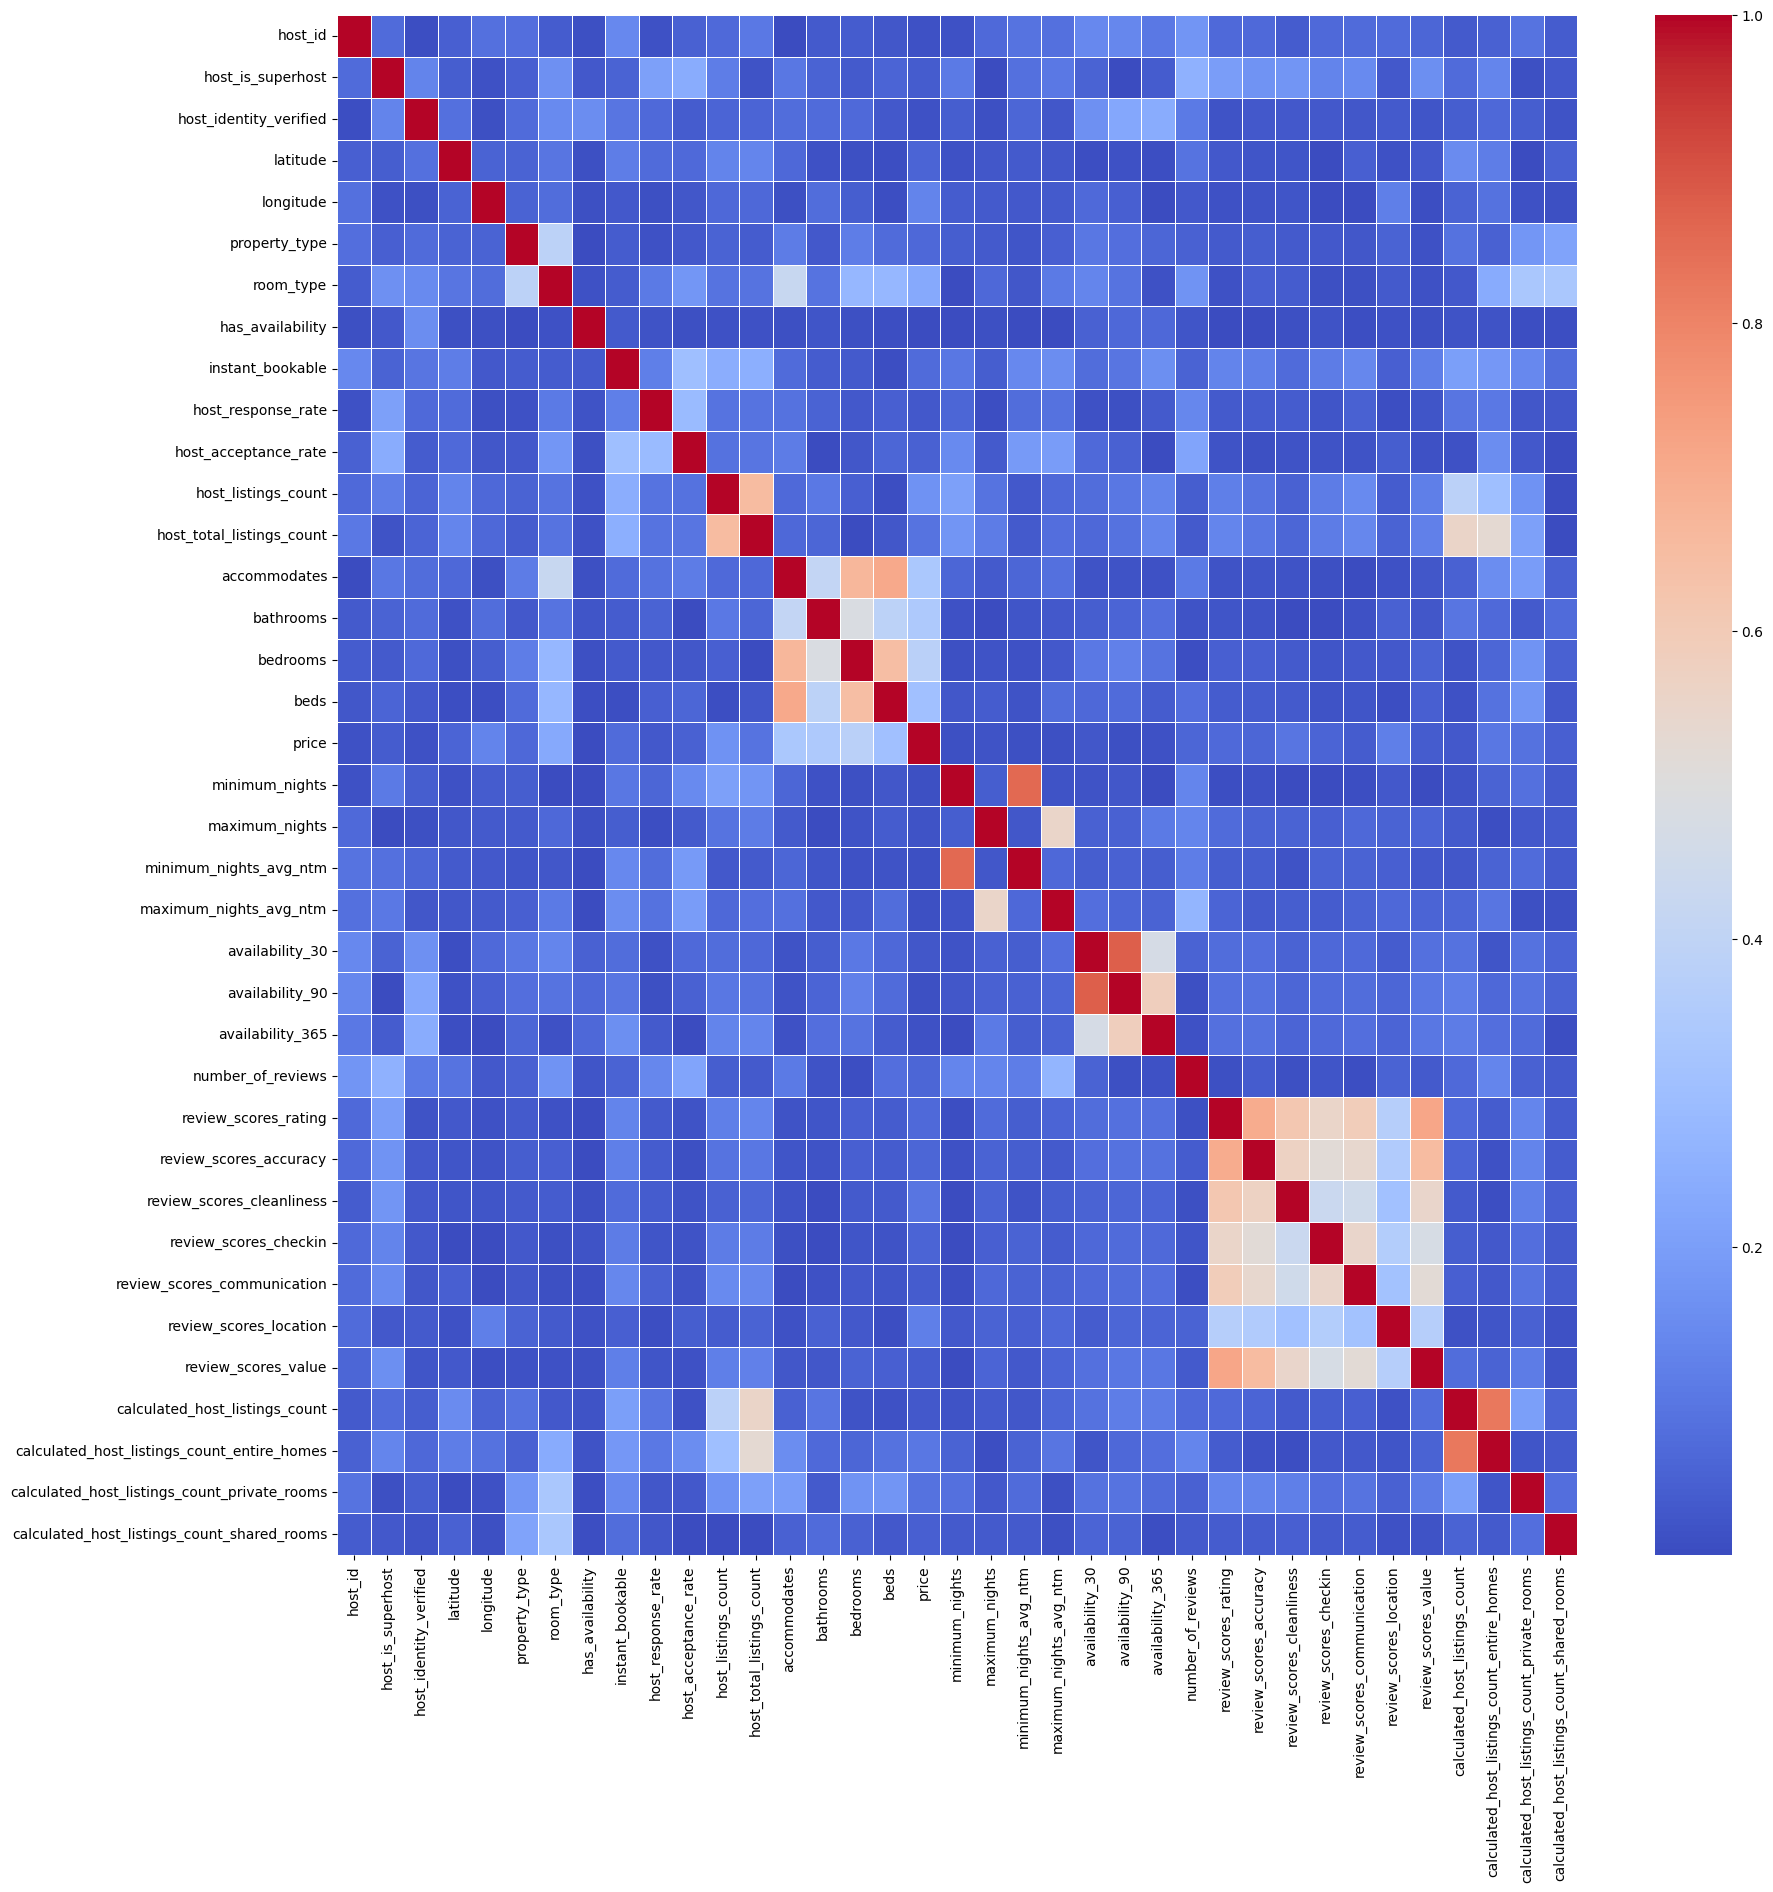

In [7]:
# Ajusta el tamaño del gráfico
plt.figure(figsize=(20, 20)) 
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'coolwarm',linewidths=0.5)
Heat_Map

In [8]:
#Leemos el dataframe 
df_milan = pd.read_csv('ValoresAtipicosMilan.csv', index_col="id")
df_milan.head(3)

,last_scraped,name,host_id,host_name,host_since,host_response_time,host_is_superhost,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
id,,,,,,,,,,,,,,,,,,,,,
6400,2024-09-17,The Studio Milan,13822,Francesca,2009-04-17,Unknown,f,f,"Milan, Lombardy, Italy",TIBALDI,...,5.00,5.00,5.00,5.00,4.56,4.67,1.0,0.0,1.0,0.0
23986,2024-09-17,""" Characteristic Milanese flat""",95941,Jeremy,2010-03-19,within an hour,f,t,Milan,NAVIGLI,...,4.67,4.22,4.59,4.74,4.70,4.48,1.0,1.0,0.0,0.0
40470,2024-09-17,Giacinto Cosy & clean flat near MM1,174203,Giacinto,2010-07-20,within an hour,f,t,Milan,VIALE MONZA,...,4.71,4.83,4.98,4.88,4.44,4.51,2.0,2.0,0.0,0.0


In [9]:
# Si hay valores no mapeados, remplázalos por 0 (o 1, dependiendo del contexto)
df_milan['host_is_superhost'] = df_milan['host_is_superhost'].map({'t': 1, 'f': 0}).fillna(0).astype(int)
df_milan['instant_bookable'] = df_milan['instant_bookable'].map({'t': 1, 'f': 0}).fillna(0).astype(int)
df_milan['has_availability'] = df_milan['has_availability'].map({'t': 1, 'f': 0}).fillna(0).astype(int)
df_milan['host_identity_verified'] = df_milan['host_identity_verified'].map({'t': 1, 'f': 0}).fillna(0).astype(int)

df_milan['room_type'] = df_milan['room_type'].map({
    'Entire home/apt':1,
    'Private room':2,
    'Hotel room':3,
    'Shared room':4
}).fillna(0).astype(int)

df_milan['property_type'] = df_milan['property_type'].map({
    'Private room in rental unit': 0,
    'Entire rental unit': 1,
    'Private room in loft': 2,
    'Entire loft': 3,
    'Entire condo': 4,
    'Private room in condo': 5,
    'Shared room in rental unit': 6,
    'Entire villa': 7,
    'Entire home': 8,
    'Private room in bed and breakfast': 9,
    'Private room in home': 10,
    'Entire vacation home': 11,
    'Private room in guest suite': 12,
    'Entire serviced apartment': 13,
    'Room in boutique hotel': 14,
    'Shared room in condo': 15,
    'Private room in villa': 16,
    'Entire place': 17,
    'Casa particular': 18,
    'Room in aparthotel': 19,
    'Entire guest suite': 20,
    'Entire townhouse': 21,
    'Private room in guesthouse': 22,
    'Private room in townhouse': 23,
    'Private room in camper/rv': 24,
    'Private room': 25,
    'Tiny home': 26,
    'Shared room in hostel': 27,
    'Private room in hostel': 28,
    'Shared room in home': 29,
    'Private room in cave': 30,
    'Private room in vacation home': 31,
    'Room in hostel': 32,
    'Entire chalet': 33,
    'Private room in serviced apartment': 34,
    'Private room in farm stay': 35,
    'Private room in nature lodge': 36,
    'Room in bed and breakfast': 37,
    'Entire guesthouse': 38,
    'Shared room in loft': 39,
    'Room in hotel': 40,
    'Room in serviced apartment': 41,
    'Private room in tiny home': 42,
    'Entire home/apt': 43,
    'Private room in casa particular': 44,
    'Boat': 45,
    'Shared room in bed and breakfast': 46,
    'Camper/RV': 47,
    'Private room in minsu': 48,
    'Shared room in guesthouse': 49,
    'Shared room in hotel': 50,
    'Shipping container': 51
}).fillna(0).astype(int)
df_milan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23705 entries, 6400 to 1247058921429251974
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  23705 non-null  object 
 1   name                                          23705 non-null  object 
 2   host_id                                       23705 non-null  int64  
 3   host_name                                     23705 non-null  object 
 4   host_since                                    23705 non-null  object 
 5   host_response_time                            23705 non-null  object 
 6   host_is_superhost                             23705 non-null  int32  
 7   host_identity_verified                        23705 non-null  int32  
 8   neighbourhood                                 23705 non-null  object 
 9   neighbourhood_cleansed                        237

In [10]:
# Filtrar solo las columnas numéricas (int y float)
df_milan = df_milan.select_dtypes(include=['int64', 'float64', 'int32'])
df_milan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23705 entries, 6400 to 1247058921429251974
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_id                                       23705 non-null  int64  
 1   host_is_superhost                             23705 non-null  int32  
 2   host_identity_verified                        23705 non-null  int32  
 3   latitude                                      23705 non-null  float64
 4   longitude                                     23705 non-null  float64
 5   property_type                                 23705 non-null  int32  
 6   room_type                                     23705 non-null  int32  
 7   has_availability                              23705 non-null  int32  
 8   instant_bookable                              23705 non-null  int32  
 9   host_response_rate                            237

In [11]:
Corr_Factors = df_milan.corr()
Corr_Factors.head()

,host_id,host_is_superhost,host_identity_verified,latitude,longitude,property_type,room_type,has_availability,instant_bookable,host_response_rate,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
host_id,1.000000,0.016509,0.012855,0.029611,-0.003295,0.042496,0.006187,NaN,0.131051,0.019749,...,0.033835,0.053165,0.004157,0.045359,0.003168,0.048007,-0.131915,-0.142075,0.048971,-0.003548
host_is_superhost,0.016509,1.000000,0.099984,0.004261,-0.003780,-0.005844,-0.041361,NaN,-0.031080,0.178456,...,0.192465,0.201872,0.170732,0.189171,0.082657,0.213464,-0.097474,-0.094145,-0.033674,-0.022168
host_identity_verified,0.012855,0.099984,1.000000,0.013277,-0.005415,0.012726,-0.036245,NaN,0.076347,0.022700,...,-0.029117,-0.030785,-0.049457,-0.043954,-0.028192,-0.029087,0.049034,0.047258,0.000351,-0.014688
latitude,0.029611,0.004261,0.013277,1.000000,0.111910,0.004526,0.022026,NaN,-0.002597,0.011123,...,0.003185,0.009701,-0.000239,0.008033,-0.065816,-0.000771,-0.000055,-0.001146,0.007069,-0.001366
longitude,-0.003295,-0.003780,-0.005415,0.111910,1.000000,0.011138,0.002073,NaN,0.026750,0.021483,...,-0.023307,-0.022798,-0.012505,-0.027269,-0.020453,-0.013769,0.006096,0.004735,0.003060,-0.013004


In [12]:
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1.head()

,host_id,host_is_superhost,host_identity_verified,latitude,longitude,property_type,room_type,has_availability,instant_bookable,host_response_rate,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
host_id,1.000000,0.016509,0.012855,0.029611,0.003295,0.042496,0.006187,NaN,0.131051,0.019749,...,0.033835,0.053165,0.004157,0.045359,0.003168,0.048007,0.131915,0.142075,0.048971,0.003548
host_is_superhost,0.016509,1.000000,0.099984,0.004261,0.003780,0.005844,0.041361,NaN,0.031080,0.178456,...,0.192465,0.201872,0.170732,0.189171,0.082657,0.213464,0.097474,0.094145,0.033674,0.022168
host_identity_verified,0.012855,0.099984,1.000000,0.013277,0.005415,0.012726,0.036245,NaN,0.076347,0.022700,...,0.029117,0.030785,0.049457,0.043954,0.028192,0.029087,0.049034,0.047258,0.000351,0.014688
latitude,0.029611,0.004261,0.013277,1.000000,0.111910,0.004526,0.022026,NaN,0.002597,0.011123,...,0.003185,0.009701,0.000239,0.008033,0.065816,0.000771,0.000055,0.001146,0.007069,0.001366
longitude,0.003295,0.003780,0.005415,0.111910,1.000000,0.011138,0.002073,NaN,0.026750,0.021483,...,0.023307,0.022798,0.012505,0.027269,0.020453,0.013769,0.006096,0.004735,0.003060,0.013004


**Mapa de calor de Milan**

<Axes: >

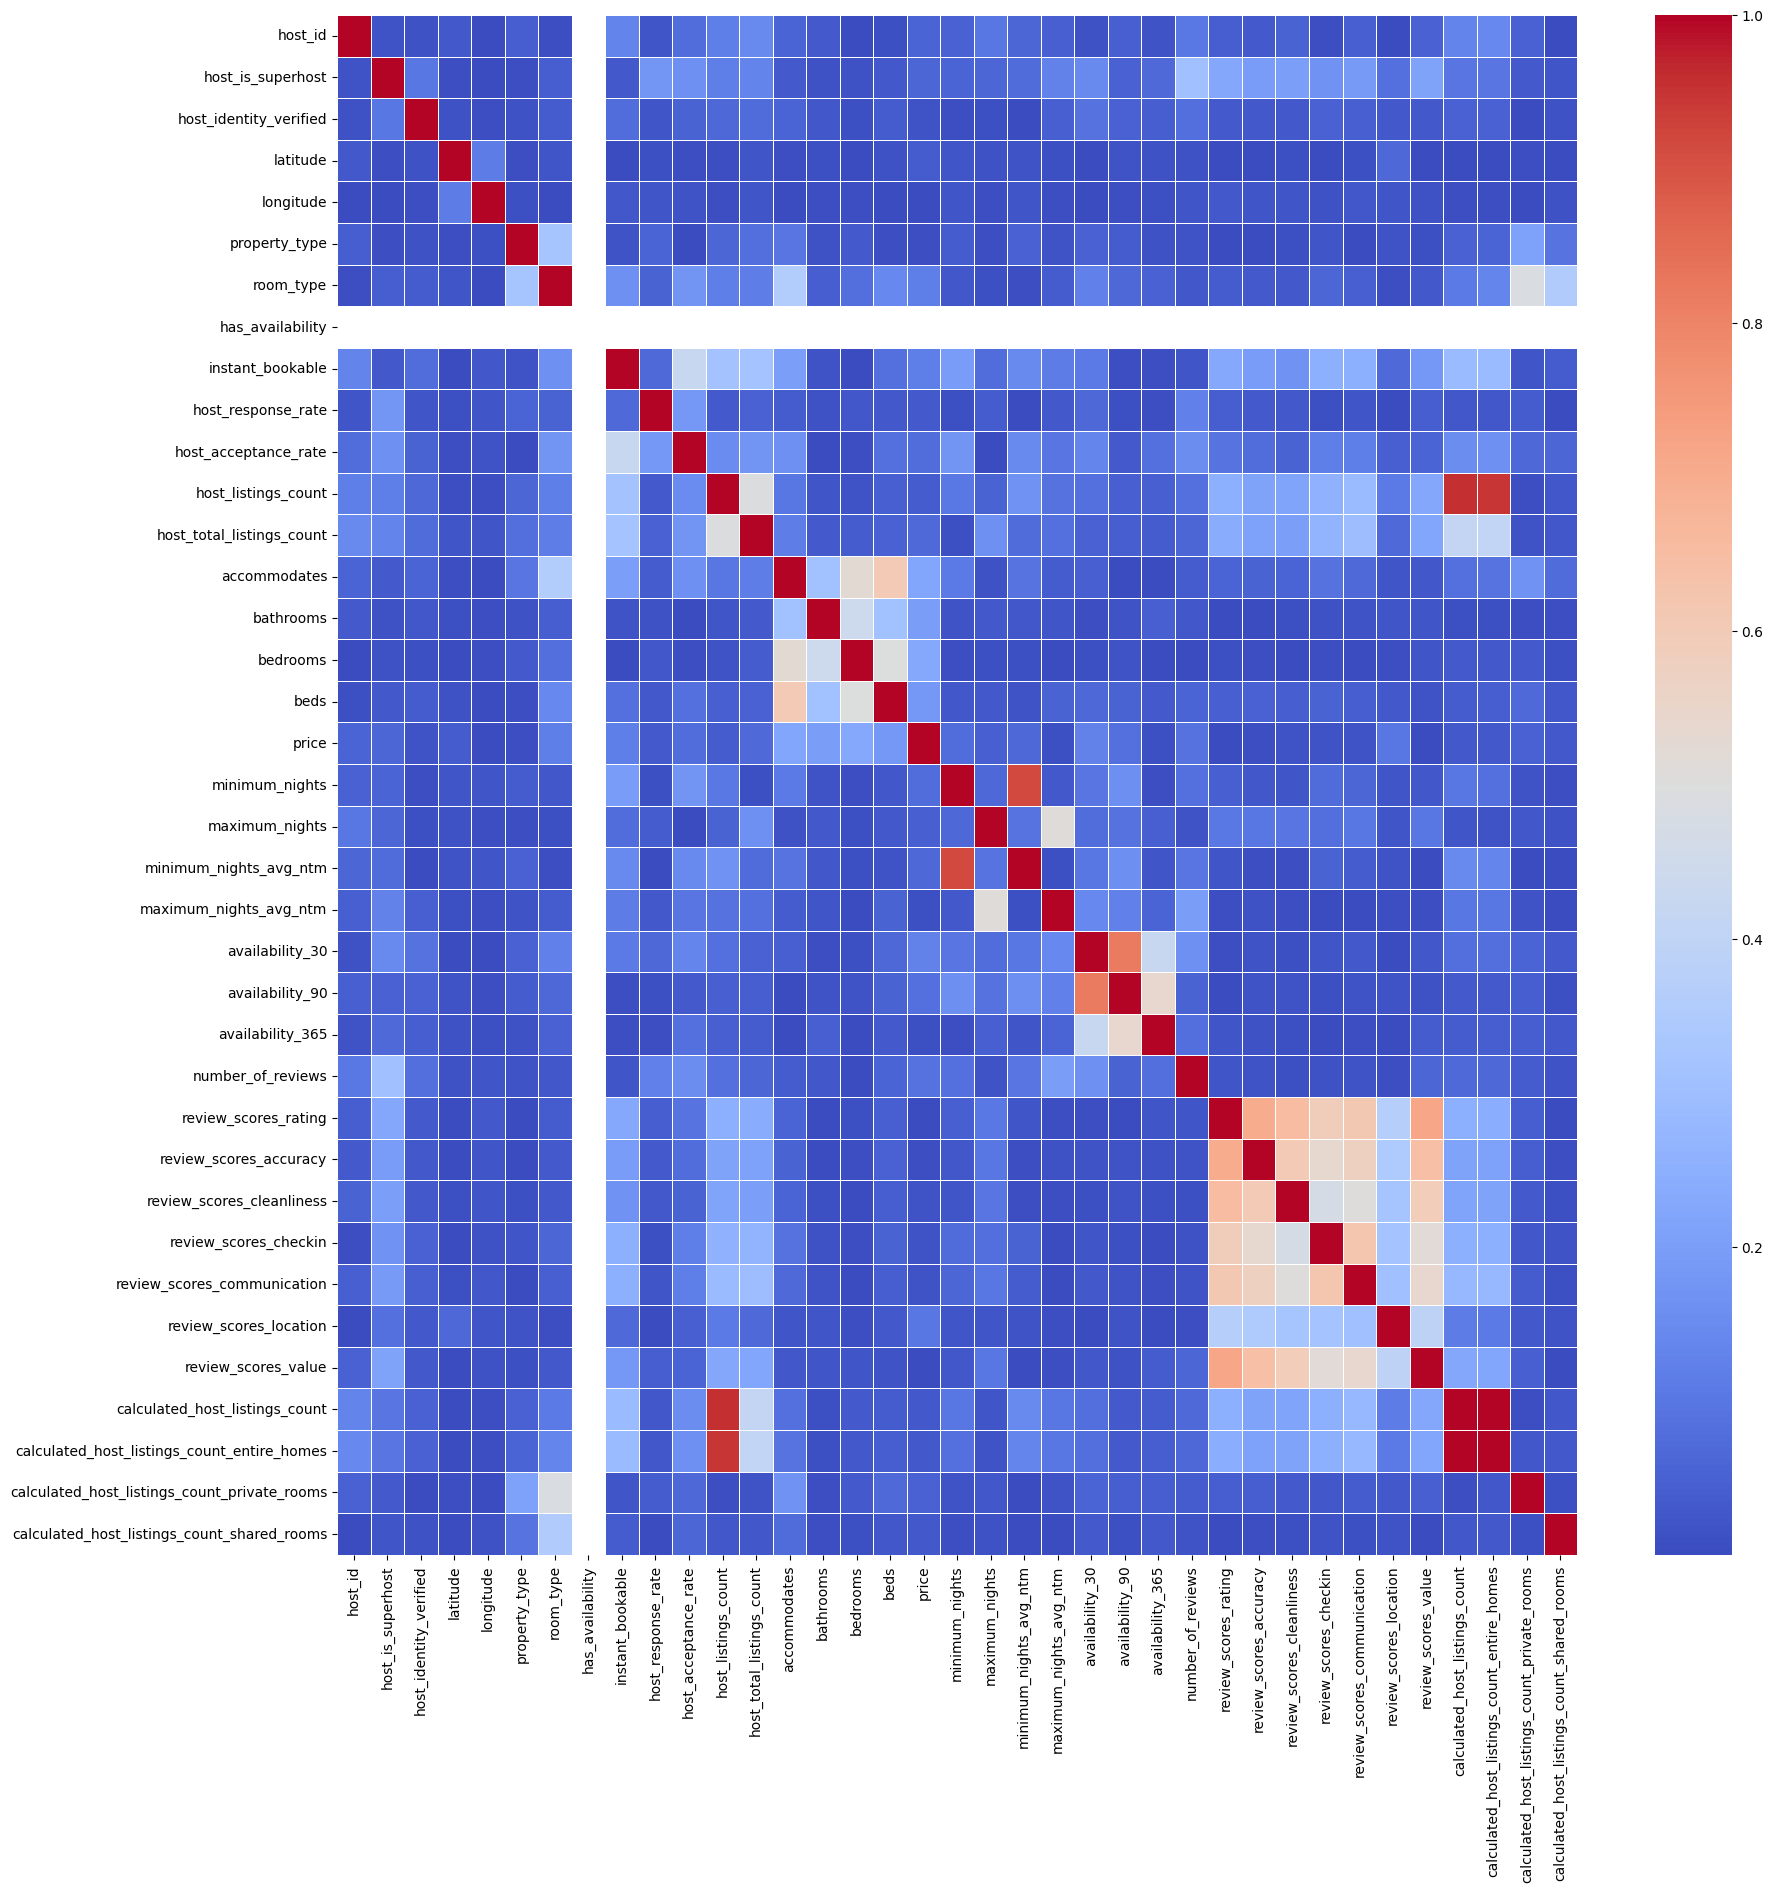

In [13]:
# Ajusta el tamaño del gráfico
plt.figure(figsize=(20, 20)) 
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'coolwarm',linewidths=0.5)
Heat_Map

**Tabla de coeficientes**

In [18]:

from prettytable import PrettyTable

# Crear una tabla con PrettyTable
table = PrettyTable()

# Definir los nombres de las columnas
table.field_names = ["Variable dependiente", "Variable independiente", "Coeficiente de Correlación", "Coeficiente de determinación", "País", "Tipo de habitación"]

# Agregar filas a la tabla
table.add_row(["accommodates","bathrooms", 0.34777977929777537, 0.12095077488840933, "Milan", "Entire home/apt"])
table.add_row(["price","instant_bookable", 0.22821873808816198, 0.052083792414553076, "Milan", "Private room"])
table.add_row(["price","host_identity_verified", 0.3253748404101097, 0.10586878677190437, "Milan", "Shared room"])
table.add_row(["price","host_acceptance_rate",  0.3082559223092921,  0.09502171363875234, "Milan", "Hotel room"])
table.add_row(["accommodates","bathrooms",  0.4769897081784841, 0.2275191817081954, "Mexico", "Entire home/apt"])
table.add_row(["price","host_identity_verified", 0.16742482470825162, 0.02803107192858878, "Mexico", "Private room"])
table.add_row(["accommodates","bathrooms", 0.0793667099149081, 0.006299074642717173, "Mexico", "Shared room"])
table.add_row(["accommodates","bathrooms", 0.5786483634422354, 0.3348339285143773, "Mexico", "Hotel room"])

# Mostrar la tabla
print(table)


+----------------------+------------------------+----------------------------+------------------------------+--------+--------------------+
| Variable dependiente | Variable independiente | Coeficiente de Correlación | Coeficiente de determinación |  País  | Tipo de habitación |
+----------------------+------------------------+----------------------------+------------------------------+--------+--------------------+
|     accommodates     |       bathrooms        |    0.34777977929777537     |     0.12095077488840933      | Milan  |  Entire home/apt   |
|        price         |    instant_bookable    |    0.22821873808816198     |     0.052083792414553076     | Milan  |    Private room    |
|        price         | host_identity_verified |     0.3253748404101097     |     0.10586878677190437      | Milan  |    Shared room     |
|        price         |  host_acceptance_rate  |     0.3082559223092921     |     0.09502171363875234      | Milan  |     Hotel room     |
|     accommodates  